In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

X = torch.arange(-5,5,0.1).view(-1,1)
func = -5 * X

Y = func + 0.4 * torch.rand(X.size())

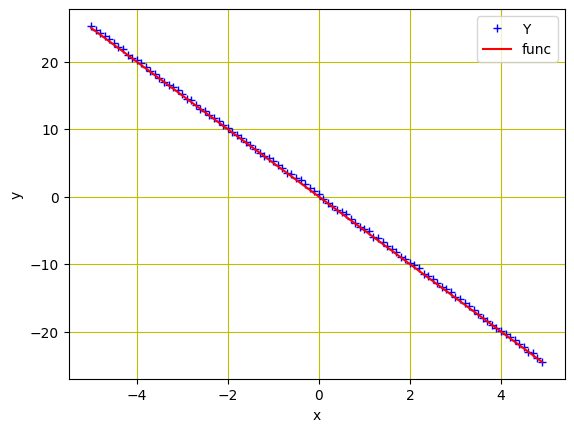

In [2]:
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

In [3]:
def forward(x):
    return w * x + b

def MSE(y_pred,y):
    return torch.mean((y_pred - y)**2)

In [4]:
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

step_size = 0.1
loss_BGD = []
n_iter = 30

In [8]:
#batch gradient descent
print('step \t loss \t weight \t bias')
for i in range(n_iter):
    
    y_pred = forward(X)
    loss = MSE(y_pred,Y)
    loss_BGD.append(loss.item())
    
    loss.backward()
    
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    
    w.grad.data.zero_()
    b.grad.data.zero_()    
    
    print(f'{i}, \t{loss.item():4f} \t{w.item():4f} \t{b.item():4f}')

step 	 loss 	 weight 	 bias
0, 	0.014185 	-4.999694 	0.161291
1, 	0.013958 	-4.999695 	0.165304
2, 	0.013813 	-4.999654 	0.168515
3, 	0.013720 	-4.999650 	0.171084
4, 	0.013661 	-4.999627 	0.173139
5, 	0.013623 	-4.999621 	0.174783
6, 	0.013599 	-4.999609 	0.176099
7, 	0.013583 	-4.999604 	0.177151
8, 	0.013573 	-4.999597 	0.177994
9, 	0.013567 	-4.999593 	0.178667
10, 	0.013563 	-4.999589 	0.179206
11, 	0.013560 	-4.999586 	0.179638
12, 	0.013558 	-4.999584 	0.179983
13, 	0.013557 	-4.999582 	0.180259
14, 	0.013557 	-4.999580 	0.180480
15, 	0.013556 	-4.999579 	0.180656
16, 	0.013556 	-4.999578 	0.180798
17, 	0.013556 	-4.999578 	0.180911
18, 	0.013556 	-4.999577 	0.181001
19, 	0.013555 	-4.999576 	0.181074
20, 	0.013555 	-4.999576 	0.181132
21, 	0.013555 	-4.999576 	0.181178
22, 	0.013555 	-4.999576 	0.181215
23, 	0.013555 	-4.999575 	0.181245
24, 	0.013555 	-4.999575 	0.181269
25, 	0.013555 	-4.999575 	0.181288
26, 	0.013555 	-4.999575 	0.181303
27, 	0.013555 	-4.999575 	0.181315
28

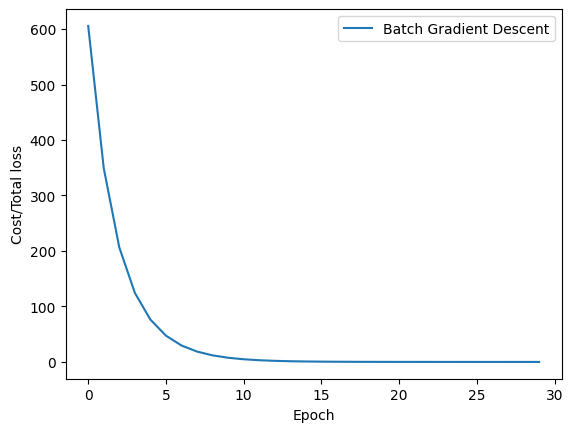

In [7]:
plt.plot(loss_BGD, label='Batch Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()

In [11]:
# stochastic gradient descent

loss_SGD = []

for i in range(n_iter):
    Y_pred = forward(X)
    loss_SGD.append(MSE(Y_pred, Y).tolist())
    
    for x,y in zip(X,Y):
        y_hat = forward(x)
        loss = MSE(y_hat,y)
        loss.backward()
        
        w.data = w.data - step_size * w.grad.data
        b.data = b.data - step_size * b.grad.data
        
        w.grad.data.zero_()
        b.grad.data.zero_()
        print(f'{i}, \t{loss.item():4f} \t{w.item():4f} \t{b.item():4f}')        

0, 	53898391846912.000000 	-6033826.000000 	665419.250000
0, 	913922064384000.000000 	23592696.000000 	-5380810.000000
0, 	14072074872029184.000000 	-90288064.000000 	18344346.000000
0, 	195981711358558208.000000 	325848224.000000 	-70195296.000000
0, 	2462065744456712192.000000 	-1117721088.000000 	243624128.000000
0, 	27808417081152503808.000000 	3628311040.000000 	-811049600.000000
0, 	281421373319778664448.000000 	-11134232576.000000 	2544074240.000000
0, 	2542305070598735265792.000000 	32228067328.000000 	-7540181504.000000
0, 	20419854387053672267776.000000 	-87806296064.000000 	21039429632.000000
0, 	145195448504074723393536.000000 	224650772480.000000 	-55169613824.000000
0, 	909682304905348600823808.000000 	-538367295488.000000 	135584923648.000000
0, 	4996195716507312832118784.000000 	1205102182400.000000 	-311458529280.000000
0, 	23920377267411110456197120.000000 	-2511940878336.000000 	666710769664.000000
0, 	99219354775308975600566272.000000 	4859117961216.000000 	-1325467

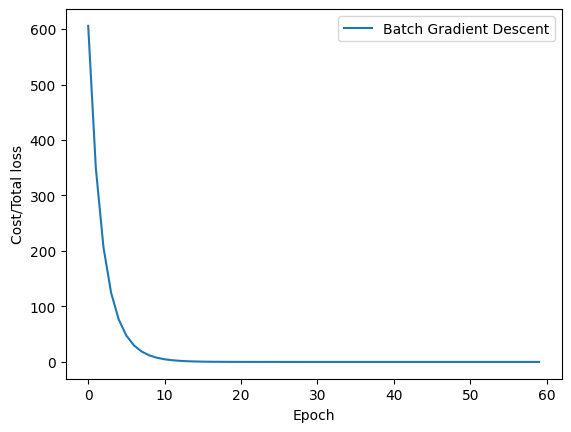

In [13]:
plt.plot(loss_BGD, label="Batch Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()

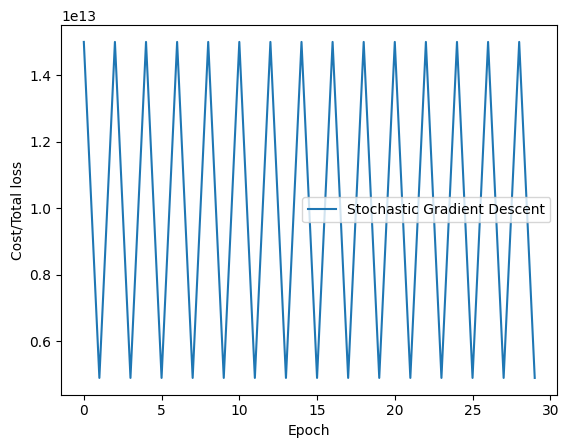

In [14]:
plt.plot(loss_SGD,label="Stochastic Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()